In [1]:
from keras.callbacks import ModelCheckpoint
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.losses import MeanSquaredLogarithmicError
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
from xgboost import XGBRegressor

In [2]:
df=pd.read_csv('mortgage_dataset4.csv')

In [3]:
df.head()

,record_date,mortgage_rate,consumer_goods_production,cpi,household_net_worth,industrial_production,rates_3months,job_openings,money_supply,money_velocity,3monthForecast,6monthForecast,12monthForecast
0,2001-01,7.0325,103.0259,175.6,41994416,91.8903,5.62,5234,4981.02,2.085,7.0775,7.1275,6.9975
1,2001-04,7.0775,102.6877,176.4,43198401,90.7293,4.53,4615,5167.06,2.059,7.1275,6.6175,6.9850
2,2001-07,7.1275,102.2020,177.4,42164052,89.2260,3.66,4447,5182.80,2.014,6.6175,6.9975,6.4850
3,2001-10,6.6175,102.4001,177.6,43746475,88.3926,2.31,3707,5316.20,1.980,6.9975,6.9850,6.1125
4,2002-01,6.9975,103.8754,177.7,44391512,88.4665,1.74,3699,5455.30,1.969,6.9850,6.4850,5.9160


In [4]:
#3 months forecast
X=df.drop(['3monthForecast','record_date','mortgage_rate','6monthForecast','12monthForecast'],axis=1)
y=df[['3monthForecast']]
X.head()

,consumer_goods_production,cpi,household_net_worth,industrial_production,rates_3months,job_openings,money_supply,money_velocity
0,103.0259,175.6,41994416,91.8903,5.62,5234,4981.02,2.085
1,102.6877,176.4,43198401,90.7293,4.53,4615,5167.06,2.059
2,102.2020,177.4,42164052,89.2260,3.66,4447,5182.80,2.014
3,102.4001,177.6,43746475,88.3926,2.31,3707,5316.20,1.980
4,103.8754,177.7,44391512,88.4665,1.74,3699,5455.30,1.969


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)
X_scaled=scaler.transform(X)

In [7]:
model = Sequential()
model.add(Dense(128,input_dim=8,activation='relu'))        
model.add(Dense(64,activation='relu'))    
model.add(Dense(1,activation='linear'))
model.compile(loss='mean_squared_error', optimizer='adam',metrics=['mae'])

In [8]:

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1152      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 9473 (37.00 KB)
Trainable params: 9473 (37.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
history=model.fit(X_train_scaled,y_train,validation_split=0.2,epochs=100)

Epoch 1/100


2/2 [==============================] - 1s 149ms/step - loss: 24.0030 - mae: 4.7756 - val_loss: 27.0919 - val_mae: 5.0563
Epoch 2/100
2/2 [==============================] - 0s 29ms/step - loss: 21.7588 - mae: 4.5441 - val_loss: 24.7606 - val_mae: 4.8213
Epoch 3/100
2/2 [==============================] - 0s 27ms/step - loss: 19.6648 - mae: 4.3177 - val_loss: 22.5055 - val_mae: 4.5836
Epoch 4/100
2/2 [==============================] - 0s 25ms/step - loss: 17.7678 - mae: 4.0983 - val_loss: 20.3508 - val_mae: 4.3438
Epoch 5/100
2/2 [==============================] - 0s 32ms/step - loss: 15.8770 - mae: 3.8667 - val_loss: 18.3229 - val_mae: 4.1037
Epoch 6/100
2/2 [==============================] - 0s 30ms/step - loss: 14.1527 - mae: 3.6482 - val_loss: 16.3984 - val_mae: 3.8591
Epoch 7/100
2/2 [==============================] - 0s 26ms/step - loss: 12.5036 - mae: 3.4150 - val_loss: 14.5368 - val_mae: 3.6069
Epoch 8/100
2/2 [==============================] - 0s 27ms/step - loss: 1

2/2 [==============================] - 0s 26ms/step - loss: 0.2798 - mae: 0.4079 - val_loss: 0.5307 - val_mae: 0.5011
Epoch 61/100
2/2 [==============================] - 0s 27ms/step - loss: 0.2775 - mae: 0.4065 - val_loss: 0.5231 - val_mae: 0.4989
Epoch 62/100
2/2 [==============================] - 0s 25ms/step - loss: 0.2745 - mae: 0.4043 - val_loss: 0.5173 - val_mae: 0.4974
Epoch 63/100
2/2 [==============================] - 0s 31ms/step - loss: 0.2720 - mae: 0.4023 - val_loss: 0.5126 - val_mae: 0.4965
Epoch 64/100
2/2 [==============================] - 0s 24ms/step - loss: 0.2693 - mae: 0.4004 - val_loss: 0.5081 - val_mae: 0.4951
Epoch 65/100
2/2 [==============================] - 0s 25ms/step - loss: 0.2672 - mae: 0.3991 - val_loss: 0.5027 - val_mae: 0.4931
Epoch 66/100
2/2 [==============================] - 0s 27ms/step - loss: 0.2645 - mae: 0.3966 - val_loss: 0.4977 - val_mae: 0.4909
Epoch 67/100
2/2 [==============================] - 0s 26ms/step - loss: 0.2620 - mae: 0.3938 - 

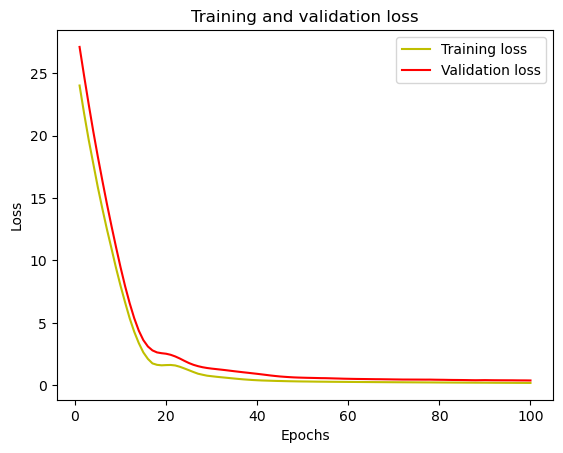

In [10]:
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(loss)+1)
plt.plot(epochs,loss,'y',label='Training loss')
plt.plot(epochs,val_loss,'r',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel("Epochs")
plt.ylabel('Loss')
plt.legend()
plt.show()

3/3 [==============================] - 0s 2ms/step


<Axes: title={'center': 'ANN'}>

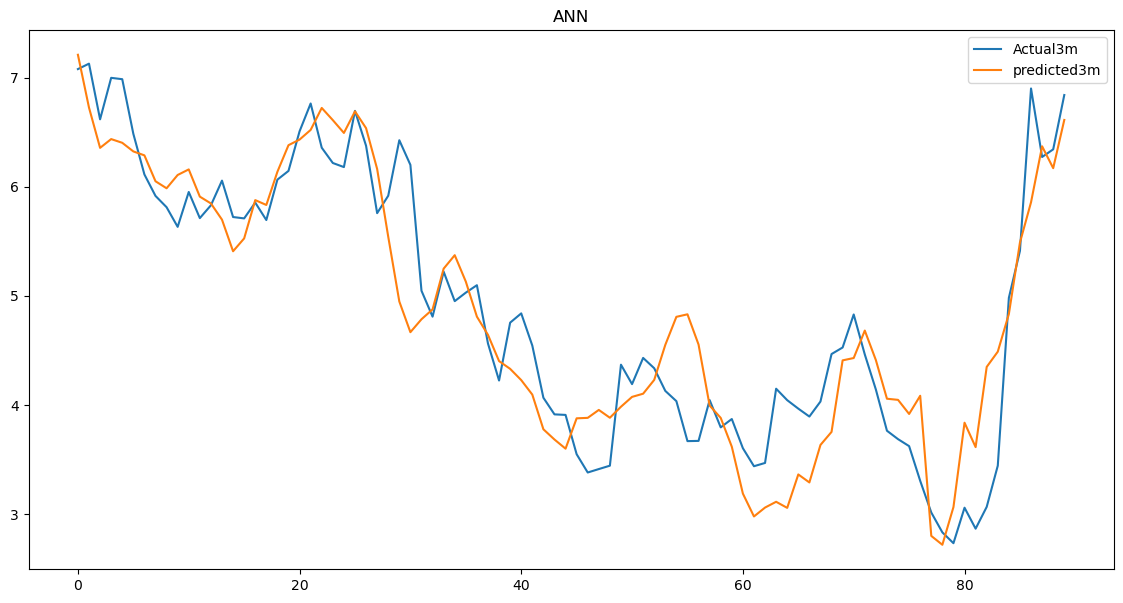

In [11]:
predictions=model.predict(X_scaled)
df['predicted3m']=predictions
df['Actual3m']=df['3monthForecast']
df[['Actual3m',"predicted3m"]].plot(title='Actual vs Predicted 3M',figsize=(14, 7))

In [12]:
mse,mae=model.evaluate(X_scaled,y)
mse


3/3 [==============================] - 0s 2ms/step - loss: 0.2544 - mae: 0.3876


0.2544468939304352

In [13]:
mae

0.3876071572303772

In [14]:
import numpy as np
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    mse = np.mean((forecast - actual)**2)  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    #acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'mse':mse,  
            'corr':corr, 'minmax':minmax})

forecast_accuracy(df['predicted3m'], df['Actual3m'])

{'mape': 0.08896535550360739,
 'me': -0.027745000648498594,
 'mae': 0.3876071196450128,
 'mpe': 0.0038747067804798642,
 'mse': 0.2544468924456546,
 'corr': 0.9133203623037555,
 'minmax': 0.08176502312004352}

In [15]:
#6 months forecast
df2=pd.read_csv('mortgage_dataset4.csv')
X1=df2.drop(['3monthForecast','record_date','mortgage_rate','6monthForecast','12monthForecast'],axis=1)
y1=df2[['6monthForecast']]
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=40)
scaler1=StandardScaler()
scaler1.fit(X1_train)
X1_train_scaled=scaler1.transform(X1_train)
X1_test_scaled=scaler1.transform(X1_test)
X1_scaled=scaler1.transform(X1)

In [16]:
model1 = Sequential()
model1.add(Dense(128,input_dim=8,activation='relu'))        
model1.add(Dense(64,activation='relu'))    
model1.add(Dense(1,activation='linear'))
model1.compile(loss='mean_squared_error', optimizer='adam',metrics=['mae'])
model1.summary()
model1.fit(X1_train_scaled,y1_train,validation_split=0.2,epochs=100)
predictions1=model1.predict(X1_scaled)
df2['predicted6m']=predictions1
df2['Actual6m']=df2['6monthForecast']


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               1152      
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 9473 (37.00 KB)
Trainable params: 9473 (37.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
2/2 [==============================] - 1s 127ms/step - loss: 28.0236 - mae: 5.1049 - val_loss: 19.1461 - val_mae: 4.2655
Epoch 2/100
2/2 [==============================] - 0s 25ms/step - loss: 25.3424 - mae: 4.8476 - val_loss: 17.4456 - val_mae: 4.0693
Epoch 3/100
2/2 [==

2/2 [==============================] - 0s 30ms/step - loss: 0.3853 - mae: 0.4934 - val_loss: 0.2381 - val_mae: 0.3975
Epoch 58/100
2/2 [==============================] - 0s 29ms/step - loss: 0.3793 - mae: 0.4892 - val_loss: 0.2409 - val_mae: 0.4001
Epoch 59/100
2/2 [==============================] - 0s 27ms/step - loss: 0.3731 - mae: 0.4847 - val_loss: 0.2433 - val_mae: 0.4016
Epoch 60/100
2/2 [==============================] - 0s 25ms/step - loss: 0.3674 - mae: 0.4806 - val_loss: 0.2459 - val_mae: 0.4033
Epoch 61/100
2/2 [==============================] - 0s 27ms/step - loss: 0.3626 - mae: 0.4773 - val_loss: 0.2493 - val_mae: 0.4057
Epoch 62/100
2/2 [==============================] - 0s 25ms/step - loss: 0.3579 - mae: 0.4732 - val_loss: 0.2527 - val_mae: 0.4076
Epoch 63/100
2/2 [==============================] - 0s 29ms/step - loss: 0.3527 - mae: 0.4692 - val_loss: 0.2558 - val_mae: 0.4091
Epoch 64/100
2/2 [==============================] - 0s 27ms/step - loss: 0.3487 - mae: 0.4655 - 

<Axes: title={'center': 'ANN2'}>

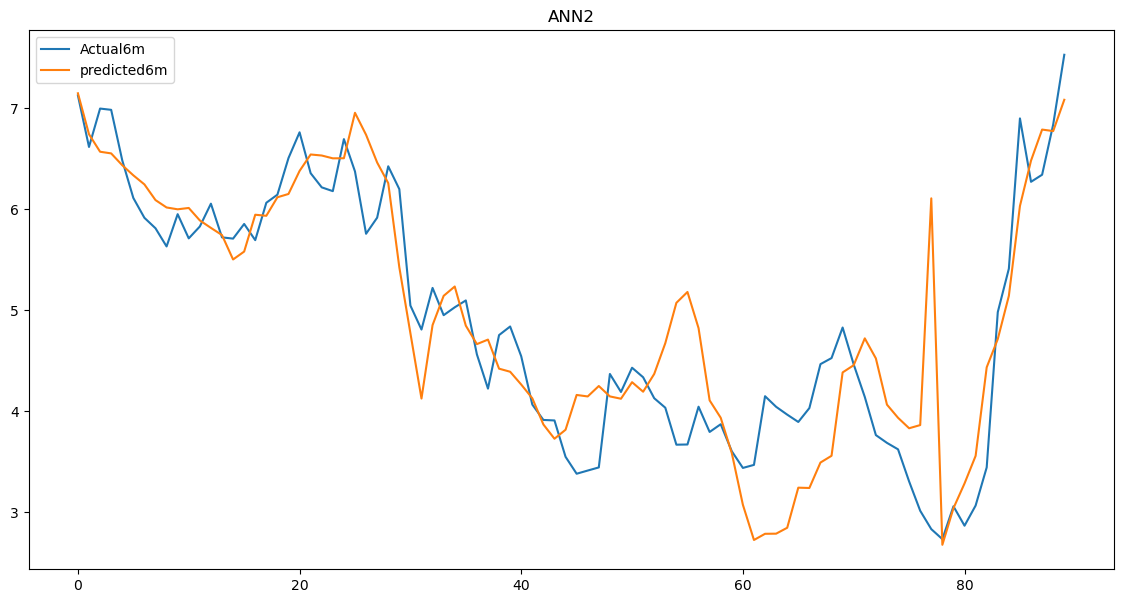

In [17]:
df2[['Actual6m',"predicted6m"]].plot(title='Actual vs Predicted 6M',figsize=(14, 7))

In [18]:
forecast_accuracy(df2['predicted6m'], df2['Actual6m'])

{'mape': 0.10783924089181046,
 'me': 0.055913679843478656,
 'mae': 0.45080359149509,
 'mpe': 0.024361300736615805,
 'mse': 0.40997103552333675,
 'corr': 0.8669738655328779,
 'minmax': 0.0925315805753485}

In [19]:
#12 months forecast
df3=pd.read_csv('mortgage_dataset4.csv')
df3.drop(df3.tail(2).index,
        inplace = True)
X2=df3.drop(['3monthForecast','record_date','mortgage_rate','6monthForecast','12monthForecast'],axis=1)
y2=df3[['12monthForecast']]
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=40)
scaler2=StandardScaler()
scaler2.fit(X2_train)
X2_train_scaled=scaler2.transform(X2_train)
X2_test_scaled=scaler2.transform(X2_test)
X2_scaled=scaler2.transform(X2)

In [20]:
model2 = Sequential()
model2.add(Dense(128,input_dim=8,activation='relu'))        
model2.add(Dense(64,activation='relu'))    
model2.add(Dense(1,activation='linear'))
model2.compile(loss='mean_squared_error', optimizer='adam',metrics=['mae'])
model2.summary()
model2.fit(X2_train_scaled,y2_train,validation_split=0.2,epochs=100)
predictions2=model2.predict(X2_scaled)
df3['predicted12m']=predictions2
df3['Actual12m']=df3['12monthForecast']

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               1152      
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 9473 (37.00 KB)
Trainable params: 9473 (37.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
2/2 [==============================] - 1s 107ms/step - loss: 25.9060 - mae: 4.9425 - val_loss: 19.1980 - val_mae: 4.2680
Epoch 2/100
2/2 [==============================] - 0s 27ms/step - loss: 23.3866 - mae: 4.6862 - val_loss: 17.4483 - val_mae: 4.0583
Epoch 3/100
2/2 [==

2/2 [==============================] - 0s 25ms/step - loss: 0.3297 - mae: 0.4526 - val_loss: 0.3263 - val_mae: 0.4416
Epoch 58/100
2/2 [==============================] - 0s 28ms/step - loss: 0.3267 - mae: 0.4511 - val_loss: 0.3342 - val_mae: 0.4488
Epoch 59/100
2/2 [==============================] - 0s 26ms/step - loss: 0.3232 - mae: 0.4484 - val_loss: 0.3406 - val_mae: 0.4555
Epoch 60/100
2/2 [==============================] - 0s 35ms/step - loss: 0.3200 - mae: 0.4466 - val_loss: 0.3434 - val_mae: 0.4579
Epoch 61/100
2/2 [==============================] - 0s 24ms/step - loss: 0.3165 - mae: 0.4435 - val_loss: 0.3451 - val_mae: 0.4598
Epoch 62/100
2/2 [==============================] - 0s 24ms/step - loss: 0.3155 - mae: 0.4413 - val_loss: 0.3441 - val_mae: 0.4588
Epoch 63/100
2/2 [==============================] - 0s 32ms/step - loss: 0.3115 - mae: 0.4394 - val_loss: 0.3449 - val_mae: 0.4601
Epoch 64/100
2/2 [==============================] - 0s 36ms/step - loss: 0.3095 - mae: 0.4384 - 

<Axes: title={'center': 'ANN3'}>

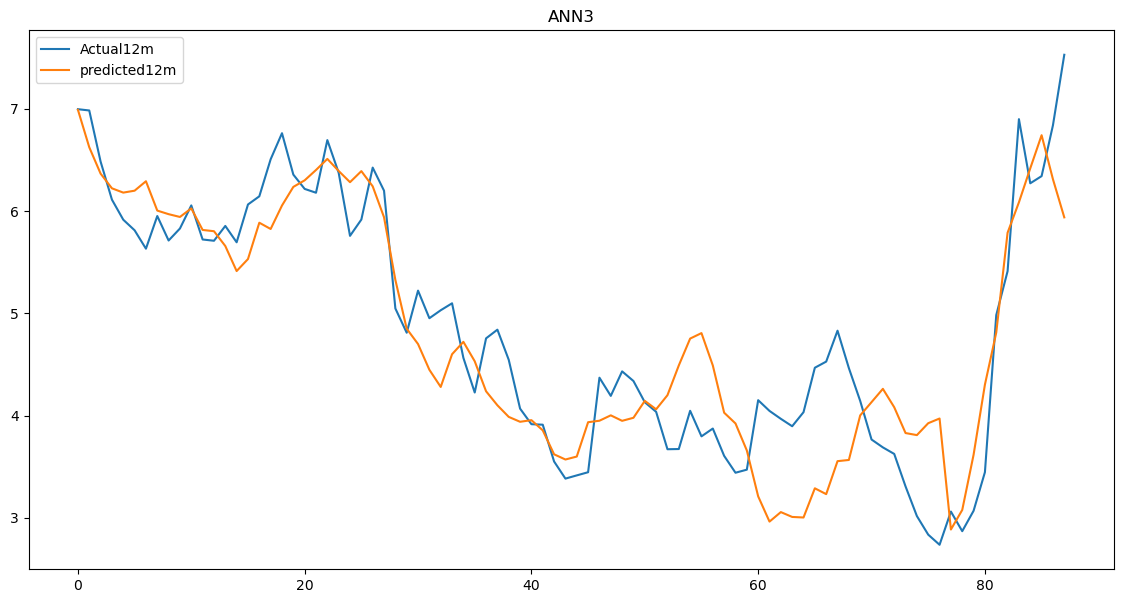

In [21]:
df3[['Actual12m',"predicted12m"]].plot(title='Actual vs Predicted 12M',figsize=(14, 7))

In [22]:
forecast_accuracy(df3['predicted12m'], df3['Actual12m'])

{'mape': 0.10445873255556366,
 'me': -0.05778305131738844,
 'mae': 0.4553822945681485,
 'mpe': 0.00026728192723220315,
 'mse': 0.33436772882672944,
 'corr': 0.8839530202386648,
 'minmax': 0.09625292682707254}

Text(0.5, 1.0, 'Actual vs Predicted 12M')

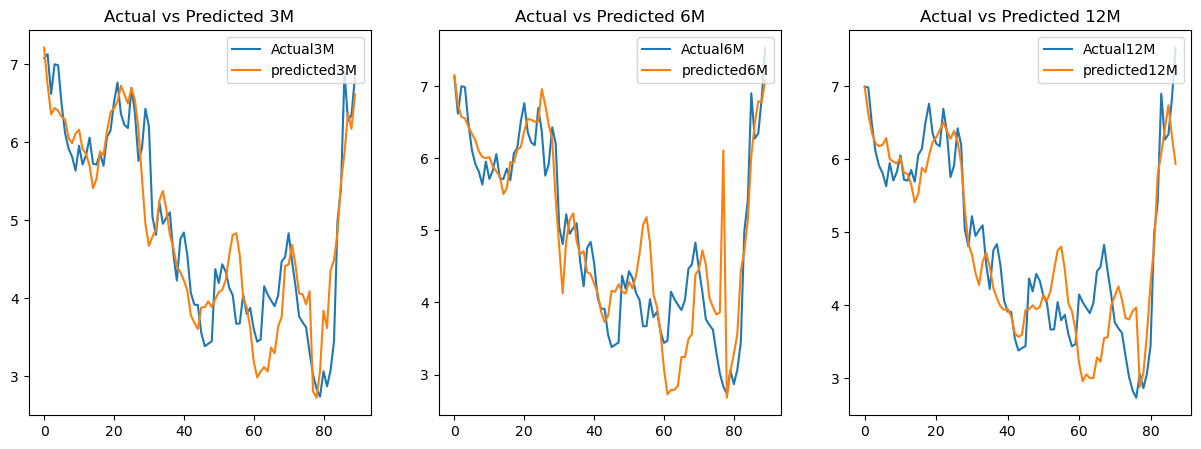

In [48]:
fig, (ax1, ax2,ax3) = plt.subplots(1, 3,figsize=(15,5))
line1, = ax1.plot(df['Actual3m'], label="Actual3M")
line2, = ax1.plot(df['predicted3m'], label="predicted3M")
ax1.legend(handles=[line1,line2], loc='upper right')
ax1.set_title('Actual vs Predicted 3M')

line3, = ax2.plot(df2['Actual6m'], label="Actual6M")
line4, = ax2.plot(df2['predicted6m'], label="predicted6M")
ax2.legend(handles=[line3,line4], loc='upper right')
ax2.set_title('Actual vs Predicted 6M')

line5, = ax3.plot(df3['Actual12m'], label="Actual12M")
line6, = ax3.plot(df3['predicted12m'], label="predicted12M")
ax3.legend(handles=[line5,line6], loc='upper right')
ax3.set_title('Actual vs Predicted 12M')
